### 데이터분석 파일

##### feature 설명
- 'Bib':  단순 id / 동명이인 등을 구분하기 위함
- 'Age_group' → 19: 19세 이하 / 70: 70세 이상 / 20~69세의 경우 → 29: 25~29세
- ‘M/F’ → Man = 0 / Woman = 1 
- 'Country' = 국적
- '5p' → 출발로부터 5km까지 기준 pace[sec/km](sec)
- '15p' → 10km부터 15km까지 기준 pace[sec/km](sec)
- 'Final_Time’ → 풀코스(42.195km) 완주 기록(sec) 
- ‘Sub’ → sub-3,4,5,6,7을 숫자로만 표현 / 3 = 완주기록 3시간 미만(sec)
- '5k' → 출발로부터 5km되었을때의 시간 기록(sec)
- '15k' → 출발로부터 15km되었을때의 시간 기록(sec)
- ‘Dataset’ → 사용 데이터셋 구분 [B: 보스턴 마라톤 / C: 시카고 / M: 모스크바]
- ‘Year’ → 해당 데이터의 년도

In [78]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv('./data/combined_marathons_with_weather.csv')

#5개 랜덤 샘플
sample = df.sample(n=5, random_state=42)
print("=== 5개 랜덤 샘플 ===")
print(sample)


=== 5개 랜덤 샘플 ===
         Bib  Age_group  M/F Country   5p  10p  15p    20p  25p  30p  ...  \
69213  69214         70    0     USA  328  326  326  328.0  330  335  ...   
6925    6926         59    0     USA  268  269  271  273.0  275  277  ...   
67420  67421         39    1     USA  284  295  305  312.0  323  328  ...   
11872  11873         59    0     USA  287  283  283  286.0  292  300  ...   
34369  34370         44    0     USA  252  249  250  256.0  270  276  ...   

        15K     20K   25K    30K    35K    40K  Dataset  Year  \
69213  4903  6568.0  8258  10057  11882  13804        B  2017   
6925   4068  5472.0  6876   8319   9792  11293        B  2015   
67420  4578  6248.0  8075   9843  11681  13431        B  2017   
11872  4252  5732.0  7307   9028  10628  12222        B  2015   
34369  3757  5122.0  6750   8309  10123  11901        B  2016   

       temperature_race  humidity_race  
69213           21.0000         39.500  
6925             7.0875         87.750  
67420 

In [79]:
#기초 통계량 (count, mean, std, min, 25%, 50%, 75%, max)
print("\n=== 기초 통계량(summary) ===")
print(df.describe())


=== 기초 통계량(summary) ===
                Bib     Age_group           M/F            5p           10p  \
count  87668.000000  87668.000000  87668.000000  87668.000000  87668.000000   
mean   43834.500000     43.890975      0.426347    307.989335    308.020190   
std    25307.716037     11.386537      0.494548     48.638794     49.000235   
min        1.000000     19.000000      0.000000    176.000000      6.000000   
25%    21917.750000     34.000000      0.000000    273.000000    273.000000   
50%    43834.500000     44.000000      0.000000    302.000000    301.000000   
75%    65751.250000     54.000000      1.000000    336.000000    335.000000   
max    87668.000000     70.000000      1.000000    804.000000    643.000000   

                15p           20p           25p           30p           35p  \
count  87668.000000  79057.000000  87668.000000  87668.000000  87668.000000   
mean     309.905724    310.100004    319.226719    323.894192    329.855569   
std       50.530835     50

In [80]:
#전체 피처·타깃 결측 확인 (optional)
print("\n=== 전체 데이터셋 결측 개수 ===")
print(df.isna().sum())


=== 전체 데이터셋 결측 개수 ===
Bib                    0
Age_group              0
M/F                    0
Country                0
5p                     0
10p                    0
15p                    0
20p                 8611
25p                    0
30p                    0
35p                    0
40p                    0
Final_Time             0
Sub                    0
5K                     0
10K                    0
15K                    0
20K                 8611
25K                    0
30K                    0
35K                    0
40K                    0
Dataset                0
Year                   0
temperature_race       0
humidity_race          0
dtype: int64


In [81]:
import pandas as pd

# 1) 데이터 불러오기
#df = pd.read_csv('./data/combined_marathons_with_weather.csv')

# 2) 보스턴 구간 경계점 고도 (m)
boundary_alt = {
    0.0: 149,
    5.0:  72,
    10.0: 55,
    15.0: 46,
    20.0: 46,
    25.0: 40,
    30.0: 18,
    35.0: 40,
    40.0: 18,
}

# 3) 5km 구간별 순고도 변화 계산
seg_ends = [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
seg_weights = {
    end: boundary_alt[end] - boundary_alt[end - 5.0]
    for end in seg_ends
}

# 4) 컬럼 초기화 (0)
for end in seg_ends:
    df[f'wt_{int(end)}K'] = 0

# 5) 보스턴 행에만 가중치 채우기
mask = df['Dataset'] == 'B'
for end, w in seg_weights.items():
    df.loc[mask, f'wt_{int(end)}K'] = w

# 6) 결과 확인
print(df.loc[mask, [f'wt_{int(e)}K' for e in seg_ends]].head())

# 보스턴이 아닌(non-B) 행 중에서 5개 랜덤 샘플
non_b_sample = df[df['Dataset'] != 'B'].sample(n=5, random_state=42)

print("=== 5개 랜덤 샘플 ===")
print(non_b_sample)


   wt_5K  wt_10K  wt_15K  wt_20K  wt_25K  wt_30K  wt_35K  wt_40K
0    -77     -17      -9       0      -6     -22      22     -22
1    -77     -17      -9       0      -6     -22      22     -22
2    -77     -17      -9       0      -6     -22      22     -22
3    -77     -17      -9       0      -6     -22      22     -22
4    -77     -17      -9       0      -6     -22      22     -22
=== 5개 랜덤 샘플 ===
         Bib  Age_group  M/F Country   5p  10p  15p  20p  25p  30p  ...  \
80483  80484         29    0     RUS  361  368  387  NaN  468  482  ...   
80937  80938         34    0     RUS  318  307  298  NaN  320  302  ...   
87080  87081         44    0     JPN  409  391  394  NaN  448  457  ...   
81741  81742         59    0     RUS  412  419  427  NaN  559  555  ...   
85647  85648         44    0     RUS  383  397  397  NaN  416  439  ...   

       temperature_race  humidity_race  wt_5K  wt_10K  wt_15K  wt_20K  wt_25K  \
80483           11.0875         81.375      0       0       0

In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# macOS 한글 폰트 설정
mpl.rcParams['font.family'] = 'AppleGothic'
# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

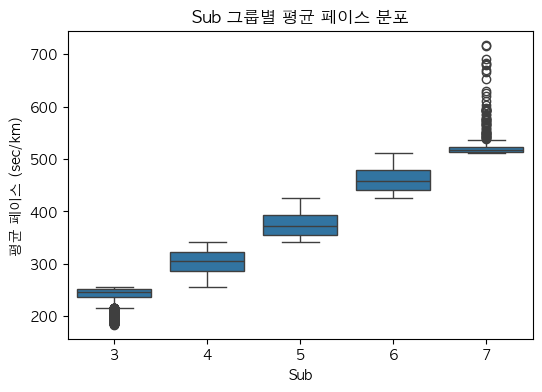

In [63]:
#1. Sub(목표 그룹)별 전체 완주 페이스 비교
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sub', y=df['Final_Time'] / 42.195)
plt.ylabel('평균 페이스 (sec/km)')
plt.title('Sub 그룹별 평균 페이스 분포')
plt.show()

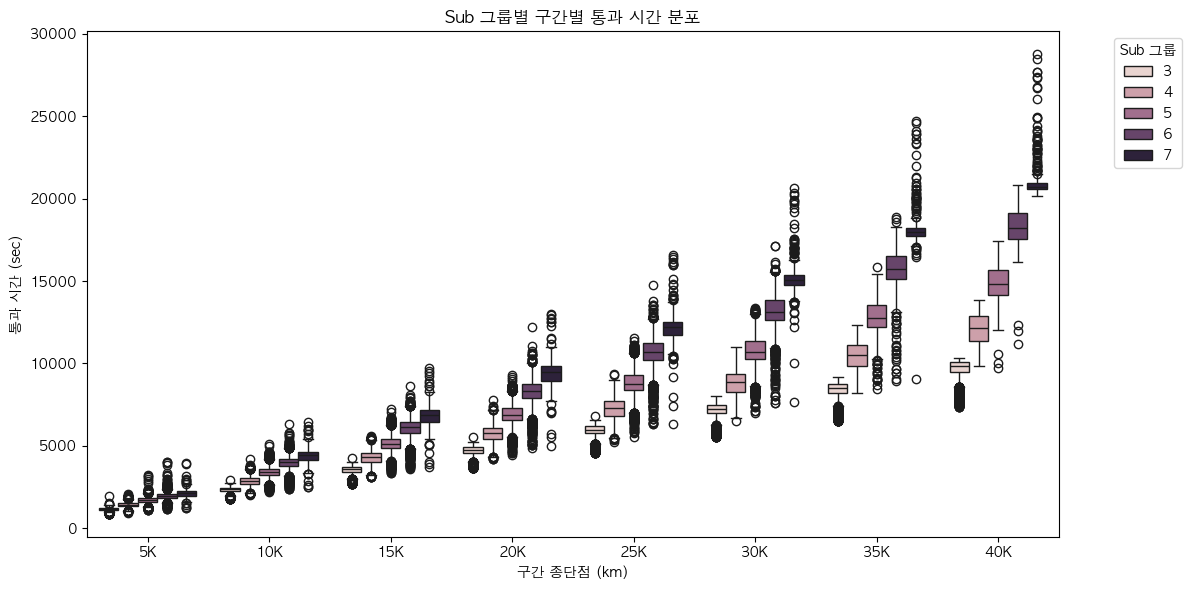

In [64]:
#2-2. Sub 그룹별 구간별 통과 시간 분포

# 1) 필요한 컬럼만 melt
segments = ['5K','10K','15K','20K','25K','30K','35K','40K']
df_melt = df.melt(
    id_vars='Sub',
    value_vars=segments,
    var_name='Segment',
    value_name='Time'
)

# 2) Segment 순서 지정
df_melt['Segment'] = pd.Categorical(
    df_melt['Segment'],
    categories=segments,
    ordered=True
)

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_melt,
    x='Segment', y='Time',
    hue='Sub'
)
plt.title('Sub 그룹별 구간별 통과 시간 분포')
plt.xlabel('구간 종단점 (km)')
plt.ylabel('통과 시간 (sec)')
plt.legend(title='Sub 그룹', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


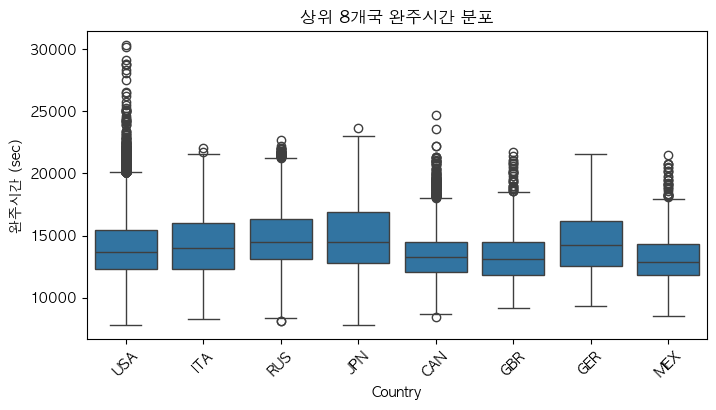

In [65]:
#3-1. 국가(Country)별 완주 기록 차이 (상위)
top_countries = df['Country'].value_counts().index[:8]
plt.figure(figsize=(8,4))
sns.boxplot(data=df[df['Country'].isin(top_countries)],
            x='Country', y='Final_Time')
plt.xticks(rotation=45)
plt.ylabel('완주시간 (sec)')
plt.title('상위 8개국 완주시간 분포')
plt.show()

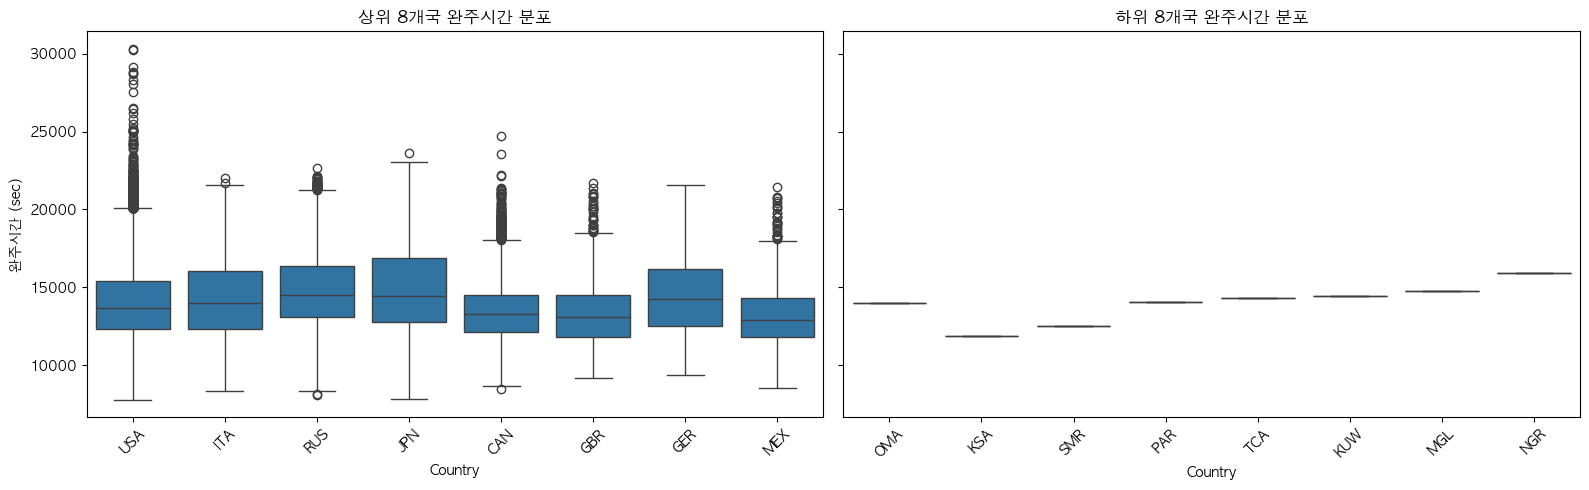

In [66]:
#3-2. 국가(Country)별 완주 기록 차이 (상하위)
# 1) 상위 8개국 / 하위 8개국 리스트 생성
country_counts = df['Country'].value_counts()
top8    = country_counts.index[:8]
bottom8 = country_counts.index[-8:]

# 2) 플롯 그리기
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# 상위 8개국
sns.boxplot(
    data=df[df['Country'].isin(top8)],
    x='Country', y='Final_Time',
    ax=axes[0]
)
axes[0].set_title('상위 8개국 완주시간 분포')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('완주시간 (sec)')

# 하위 8개국
sns.boxplot(
    data=df[df['Country'].isin(bottom8)],
    x='Country', y='Final_Time',
    ax=axes[1]
)
axes[1].set_title('하위 8개국 완주시간 분포')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

동양 국가별 참가자 수:
Country
JPN    495
CHN    478
KOR    285
HKG    276
TPE     21
Name: count, dtype: int64


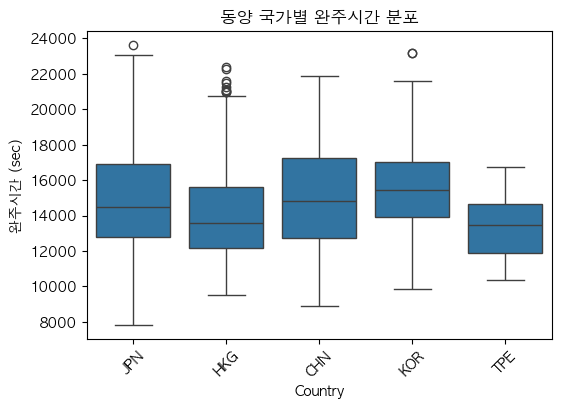

In [67]:
#3-3. 국가(Country)별 완주 기록 차이 (동양)
# 1) 동양 국가 코드 리스트 정의
eastern_countries = ['KOR', 'JPN', 'CHN', 'TPE', 'HKG']

# 2) 동양 국가만 필터링
df_east = df[df['Country'].isin(eastern_countries)].copy()

# 3) 간단히 참가자 수 확인
print("동양 국가별 참가자 수:")
print(df_east['Country'].value_counts())

# 4) 완주시간 분포 박스플롯
plt.figure(figsize=(6,4))
sns.boxplot(data=df_east, x='Country', y='Final_Time')
plt.xticks(rotation=45)
plt.title('동양 국가별 완주시간 분포')
plt.ylabel('완주시간 (sec)')
plt.show()


=== 그룹별 완주시간 기초통계 ===
            n     mean(sec)  median(sec)     std(sec)
group                                                
Bottom      8  13988.750000      14201.0  1266.711462
East     1060  14982.766038      14623.5  2783.275437
Top     81651  14090.450564      13696.0  2498.914940


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_4149/2692999921.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='group', y='Final_Time',


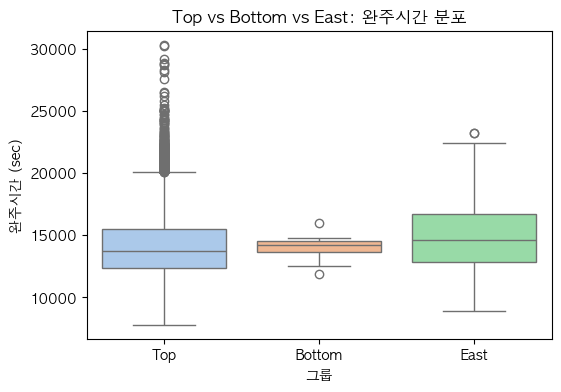

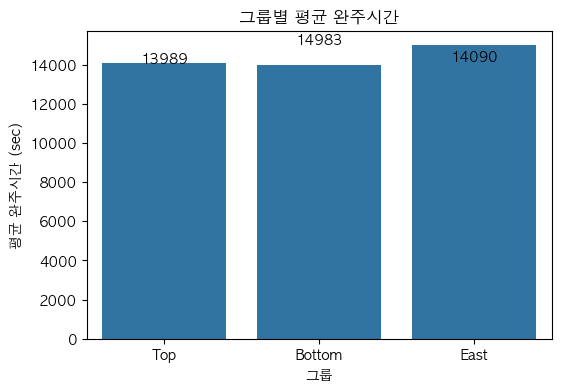

In [68]:
#3-4. 국가(Country)별 완주 기록 차이 (상위, 하위, 동양 비교)
# 1) 그룹별 국가 코드 정의
country_counts = df['Country'].value_counts()
top8    = set(country_counts.index[:8])
bottom8 = set(country_counts.index[-8:])
east_asia = {'KOR','JPN','CHN','TPE','HKG'}  # 필요시 더 추가

# 2) 각 행에 group 라벨 할당
def label_group(c):
    if c in top8:
        return 'Top'
    if c in bottom8:
        return 'Bottom'
    if c in east_asia:
        return 'East'
    return None

df['group'] = df['Country'].map(label_group)

# 3) 관심 있는 세 그룹만 필터
df3 = df[df['group'].notna()].copy()

# 4) 기초통계: 평균·중앙값·표준편차
stats = df3.groupby('group')['Final_Time'] \
           .agg(['count','mean','median','std']) \
           .rename(columns={'count':'n','mean':'mean(sec)','median':'median(sec)','std':'std(sec)'})
print("=== 그룹별 완주시간 기초통계 ===")
print(stats)

# 5) 박스플롯으로 분포 비교
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, x='group', y='Final_Time',
            order=['Top','Bottom','East'],
            palette='pastel')
plt.title('Top vs Bottom vs East: 완주시간 분포')
plt.xlabel('그룹')
plt.ylabel('완주시간 (sec)')
plt.show()

# 6) 평균·중앙값 막대그래프
plt.figure(figsize=(6,4))
sns.barplot(x=stats.index, y=stats['mean(sec)'], order=['Top','Bottom','East'])
for i, v in enumerate(stats['mean(sec)']):
    plt.text(i, v+50, f"{v:.0f}", ha='center')
plt.title('그룹별 평균 완주시간')
plt.ylabel('평균 완주시간 (sec)')
plt.xlabel('그룹')
plt.show()

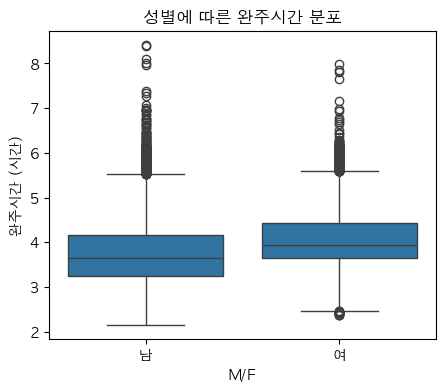

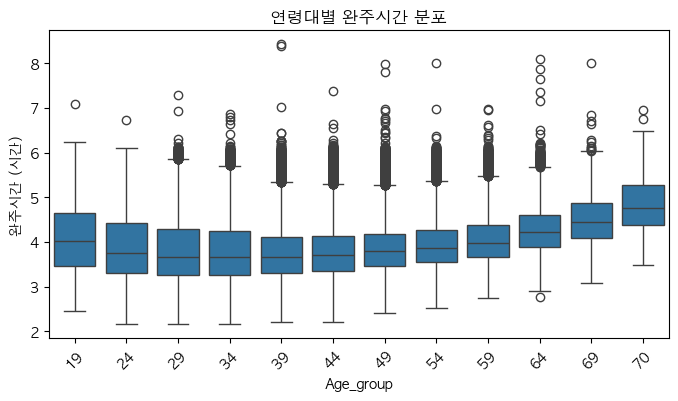

In [69]:
#4. 성별・연령대별 완주 페이스

# 1) Final_Time을 시간, 분 단위로 추가
df['Finish_Hours'] = df['Final_Time'] / 3600       # 시간 단위
df['Finish_Minutes'] = df['Final_Time'] / 60       # 분 단위

# ——— (A) 성별에 따른 완주시간 분포 ———
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='M/F', y='Finish_Hours')
plt.xticks([0,1], ['남','여'])
plt.ylabel('완주시간 (시간)')
plt.title('성별에 따른 완주시간 분포')
plt.show()

# ——— (B) 연령대에 따른 완주시간 분포 ———
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Age_group', y='Finish_Hours')
plt.xticks(rotation=45)
plt.ylabel('완주시간 (시간)')
plt.title('연령대별 완주시간 분포')
plt.show()

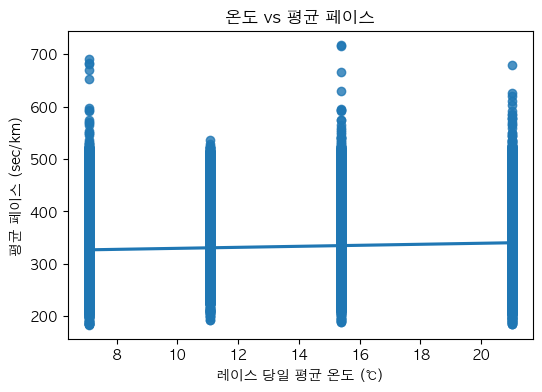

In [70]:
#5. 환경 변수(온도) vs 페이스 상관
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='temperature_race', y=df['Final_Time']/42.195)
plt.xlabel('레이스 당일 평균 온도 (℃)')
plt.ylabel('평균 페이스 (sec/km)')
plt.title('온도 vs 평균 페이스')
plt.show()

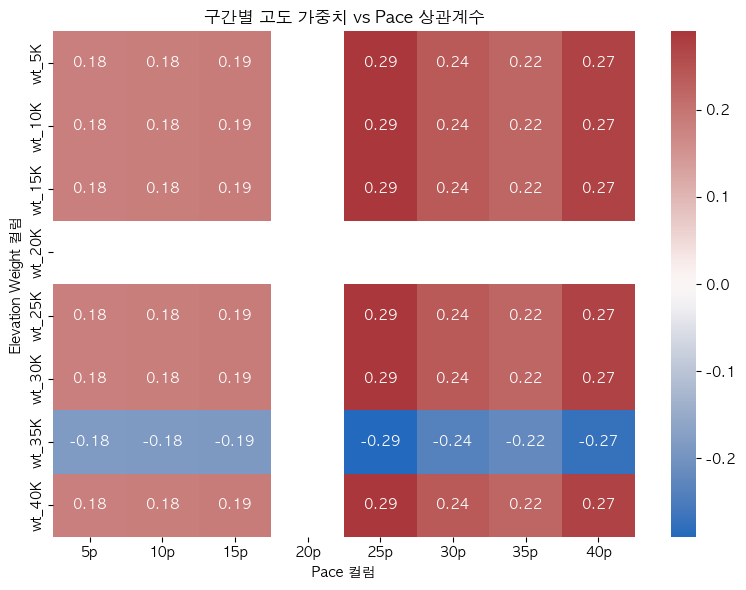

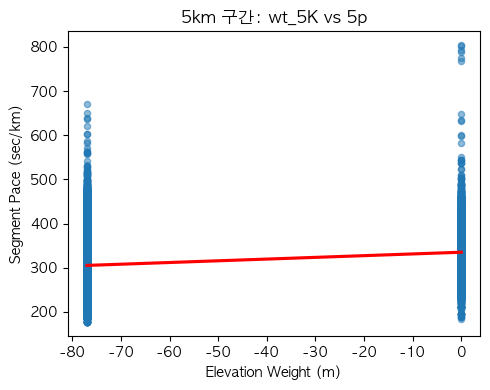

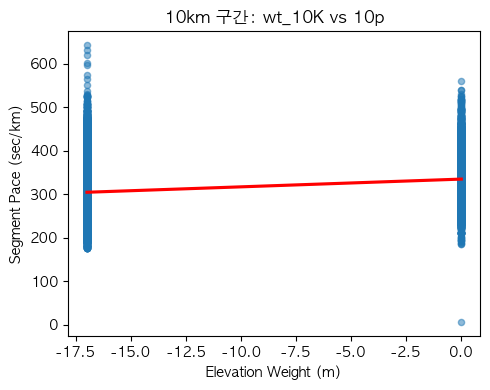

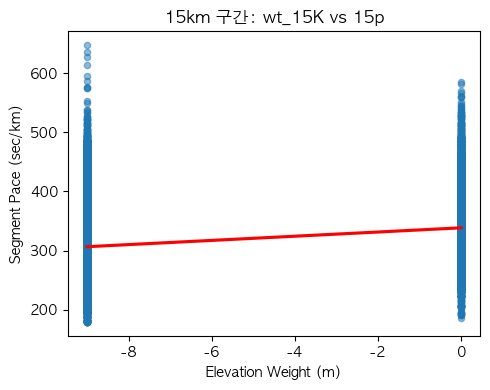

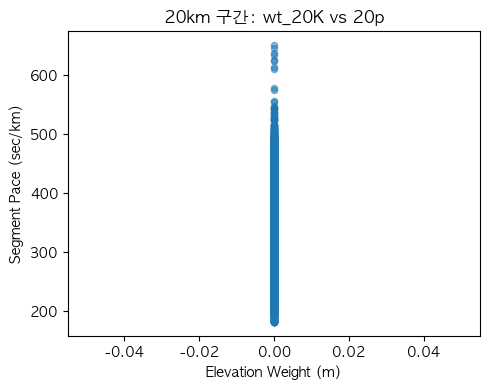

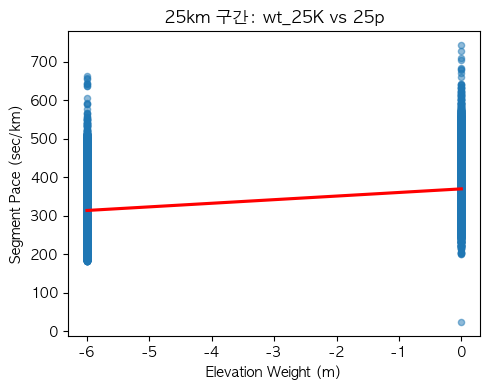

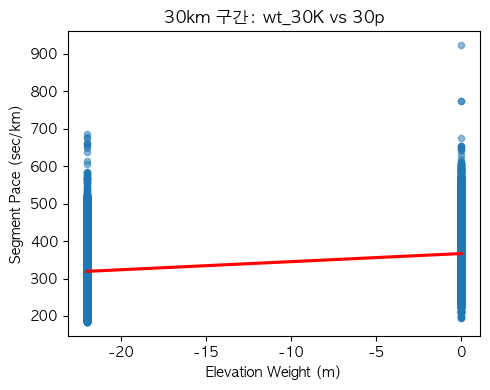

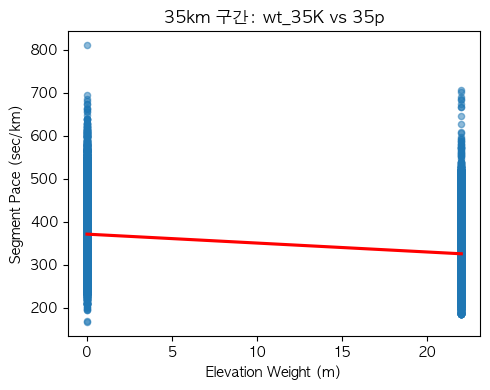

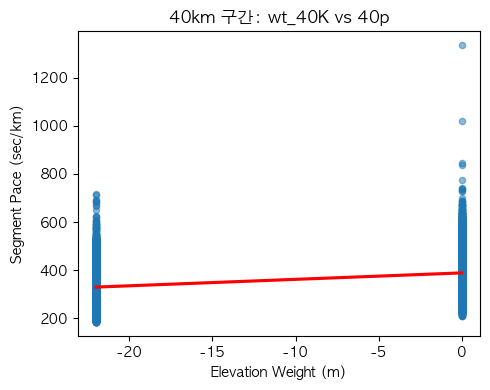

In [72]:
#6. 고도 가중치와 페이스, 전체 완주시간 상관관계
# 1) 컬럼 리스트
seg_km     = [5,10,15,20,25,30,35,40]
elev_cols  = [f'wt_{km}K' for km in seg_km]
pace_cols  = ['5p','10p','15p','20p','25p','30p','35p','40p']

# 2) 상관계수 매트릭스 계산
corr = df[elev_cols + pace_cols].corr().loc[elev_cols, pace_cols]

# 3) Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag')
plt.title('구간별 고도 가중치 vs Pace 상관계수')
plt.xlabel('Pace 컬럼')
plt.ylabel('Elevation Weight 컬럼')
plt.tight_layout()
plt.show()

# 4) 산점도 + 회귀선 (각 구간별)
for km, wt_col, pace_col in zip(seg_km, elev_cols, pace_cols):
    plt.figure(figsize=(5,4))
    sns.regplot(
        data=df, x=wt_col, y=pace_col,
        scatter_kws={'s':20, 'alpha':0.5},
        line_kws={'color':'red'}
    )
    plt.title(f'{km}km 구간: {wt_col} vs {pace_col}')
    plt.xlabel('Elevation Weight (m)')
    plt.ylabel('Segment Pace (sec/km)')
    plt.tight_layout()
    plt.show()

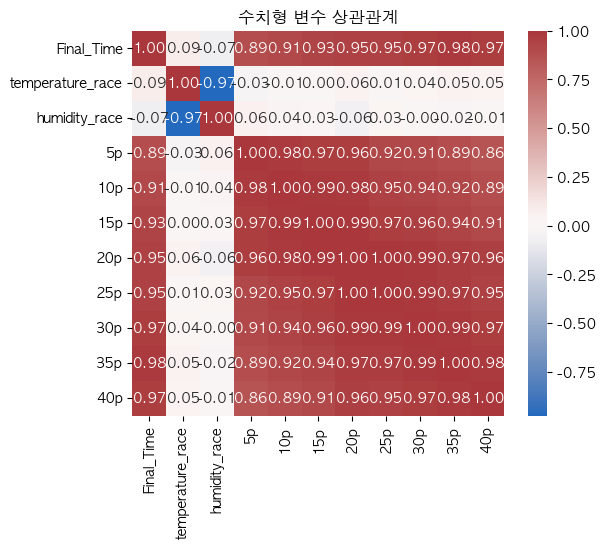

In [71]:
#7. 전체 수치형 Feature 상관관계 히트맵
num_cols = ['Final_Time', 'temperature_race','humidity_race'] + pace_cols
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title('수치형 변수 상관관계')
plt.show()

1. 구간별 Pace 상관관계

5p,10p,…,40p (혹은 pace_*로 재계산했다면 그 값들) 가 서로 0.86~0.99 사이의 매우 높은 상관을 보입니다.

즉, 초반 페이스가 빠르면 거의 끝까지 일관되게 빠른 경향이 있습니다.

2. Final_Time vs Pace

모든 구간 Pace와 Final_Time(풀코스 총 완주 시간)은 0.89~0.98 의 매우 강한 양(+)의 상관을 가집니다.

전체 완주 시간은 곧 5km 구간 페이스들의 합(또는 평균)이므로 당연히 높게 나옵니다.

3. 온도·습도 영향

temperature_race 와 Final_Time 은 약 –0.09 (약한 음의 상관),

humidity_race 와 Final_Time 은 약 –0.07 로,

두 환경 변수는 페이스와도 거의 상관이 없습니다.

다만 온도와 습도끼리는 –0.97 로 매우 강한 음(–)의 상관을 보이는데, 이는 데이터 수집 환경(높은 온도일수록 상대습도가 낮게 기록됨)을 반영하는 듯합니다.

결론: 이 데이터에선 “누가 빠른지”는 전 구간 페이스가 강하게 묶여 있고, 환경 요인(온도·습도)은 페이스나 완주 시간에 미미한 영향만 줍니다.
따라서 모델에 넣을 때는 구간별 pace 와 Final_Time 은 중복 정보이니 하나만 쓰거나, PCA 등으로 차원 축소를 고려하는 게 좋습니다.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# 1) Sub-3 검증 데이터 확보 (예: Sub == 3)
df_sub3 = df[df['Sub'] == 3].reset_index(drop=True)

# 2) 특성 및 타깃 정의
#   X: 신체정보, 목표그룹(Sub), 환경요인, 보스턴 고도 가중치(wt_*)
feature_cols = [
    'M/F',          # 성별 (0=남,1=여)
    'Age_group',    # 연령대
    'Sub',          # 목표 그룹
    'temperature_race',
    'humidity_race',
    # 보스턴만 값이 들어있는 wt_컬럼 (없으면 NaN→0 처리 필요)
    'wt_5K', 'wt_10K', 'wt_15K', 'wt_20K',
    'wt_25K', 'wt_30K', 'wt_35K', 'wt_40K'
]

#   Y: 5km 구간별 페이스(초/km)
target_cols = ['5p','10p','15p','20p','25p','30p','35p','40p']

#-------------------------------------------

#-------------------------------------------

X = df_sub3[feature_cols].fillna(0)   # NaN 이 있으면 0 으로 대체
Y = df_sub3[target_cols]

# 3) 학습/검증 분할
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# 4) 파이프라인 구성 (스케일링 + 다중출력 회귀)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MultiOutputRegressor(
        RandomForestRegressor(n_estimators=100, random_state=42)
    ))
])

# 5) 학습
pipeline.fit(X_train, Y_train)

# 6) 검증
Y_pred = pipeline.predict(X_val)

print("=== 구간별 MAE & R² ===")
for i, col in enumerate(target_cols):
    mae = mean_absolute_error(Y_val.iloc[:, i], Y_pred[:, i])
    r2  = r2_score(Y_val.iloc[:, i],    Y_pred[:, i])
    print(f"{col}: MAE={mae:.2f} sec/km,  R²={r2:.3f}")

# 7) 예측 예시: 30세 남성, Sub-3, 10℃·80% 습도, 보스턴 고도 가중치 적용
example = pd.DataFrame([{
    'M/F': 0,
    'Age_group': 30,
    'Sub': 3,
    'temperature_race': 10,
    'humidity_race': 80,
    'wt_5K':  -77,
    'wt_10K': -17,
    'wt_15K':  -9,
    'wt_20K':   0,
    'wt_25K': -6,
    'wt_30K': -22,
    'wt_35K': +22,
    'wt_40K': -22
}])
pred = pipeline.predict(example)
print("\n예측된 구간별 페이스(sec/km):")
print(dict(zip(target_cols, pred[0])))


ValueError: Input y contains NaN.